<a href="https://colab.research.google.com/github/JieyuZhang97/WISER_Enverus_2021/blob/main/notebook_demo_WISER_complete_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

This notebook contains a simple example using kNN (k-nearest neighbors) to classify music from three spotify playlist. 
- First we will learn how the import songs and music features using <a href=https://spotipy.readthedocs.io/en/2.17.1/>spotipy</a>, a lightweight Python library for the Spotify Web API. 
- Second we will explore the dataset a little bit by plotting some of the data. 
- Third we will build a model to identify the genre of a song using kNN. 
    - we will first build the model from scratch 
    - next we will see how we can take advantage of the powerful machine learning library called `sklearn` 

Before getting started, we need to import the various libraries we will use later. You will see `import` in almost every python script you encounter on the Internet. This is because those libraries are what make python so powerful and so popular. Here you can see that I import the libraries we are using later. But you don't have to figure out all the libraries needed at the beginning. You can alway import more libraries later on when needed.  

In [1]:
# install the library 
!pip install spotipy

     |████████████████████████████████| 153kB 8.6MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# import data ETL (explore, transform and load) related libraries 

## load: import spotify-related libraries 
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

## explore
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

## build model 
import math 


# Load data from Spotify using Spotipy

It is very easy to get access to songs in Spotify using the `Spotipy` library. All you need is a Spotify account. There are three steps you need to do on the Spotify website


- Log into your Spotify account and get your user name, copy and paste it in the following `username` varible 

- Use this <a href='https://developer.spotify.com/dashboard/'>web site</a>, log in with your Spotify account. Then you will be directed to a Dashboard page, choose create an app. You will get the `Client ID` and `Client Secret`, copy and paste them to this notebook. 
- Click `Edit setting` on the upper right conner of the screen, set the redirect_url with any working website. Here I used https://www.google.ca/. Copy and paste the redirect_url to this notebook. 

- Next you need to grant authorization from your account to your app. We will use python to do this.   



Now you are good to go. 

If you don't want to create a Spotify account, you can use mine as well. Here is an introduction of Spotipy. <a herf='https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b'>Getting Started with Spotify’s API & Spotipy</a>


In [ ]:
# input necessary credentials 
client_id = "paste your client id here"
 
client_secret = "paste your client secret here"

username = "paste your user name"

redirect_uri='paste your redirect uri here '

# get the token at https://developer.spotify.com/console/ 
# scope = 'user-library-read playlist-read-private'
token = 'paste your token here'

In [4]:
## connect the notebook withall the muisc on spotify 
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager,auth=token)

In [ ]:
# if you are using your local PC to run this notebook, you can run the following two lines to get the token 
# scope = 'user-library-read playlist-read-private'
# token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

To get all the songs from the three playlists, we need to know the ids of the three playlists. Here are the links to the three playlists, they are Classical Reading, Jazz Coffee and Rap Workout. The playlist id is the string after the last /.

- Classical Reading: https://open.spotify.com/playlist/37i9dQZF1DWYkztttC1w38
- Jazz Coffee: https://open.spotify.com/playlist/1WxyPZDwKySzXaiE7RHgtV
- Rap Workout: https://open.spotify.com/playlist/37i9dQZF1DWZiyat8YCzeB

In [5]:
# %%
classical_id = '37i9dQZF1DWYkztttC1w38'
jazz_id = '1WxyPZDwKySzXaiE7RHgtV'
rap_id = '37i9dQZF1DWZiyat8YCzeB'

To get the songs, I wrote a helper function. 

In [6]:
### - back to slides ###
def get_playlist(playlist_id,genre):
    # connect to the playlist 
    playlist = sp.user_playlist(user_name, playlist_id=playlist_id)
    # this line allows us to get all the necessary information of all the songs in that playlist  
    songs = playlist["tracks"]["items"] 
    # create placeholders (empty strings) for storing relavent information 
    ids = [] # id of the song 
    artist_names = [] # name of the artist
    song_names = [] # name of the song 
    for i in range(len(songs)): 
        song_names.append(songs[i]["track"]['name'])
        artist_names.append(songs[i]["track"]['artists'][0]['name'])
        ids.append(songs[i]["track"]["id"]) 
    # get the features of the song 
    features = sp.audio_features(ids) 
    # use a pandas DataFrame to store the music features 
    df = pd.DataFrame(features)
    # add the necessary information we gathered previously to the dataframe 
    df['artist_name'] = artist_names
    df['song_name'] = song_names
    # add the genre of the song
    df['genre'] = genre
    return df 

In [7]:
# create all three dataframe 
df_classical = get_playlist(classical_id,'classical')
df_jazz = get_playlist(jazz_id,'jazz')
df_rap = get_playlist(rap_id,'rap')

Let's see what the data look like.

columns `danceability` to `tempo` are music features and the rest are song information. 

In [8]:
df_classical.head(3).T

,0,1,2
danceability,0.266,0.253,0.157
energy,0.0662,0.0313,0.184
key,7,4,4
loudness,-21.072,-26.923,-19.854
mode,1,0,0
speechiness,0.0356,0.0522,0.0442
acousticness,0.977,0.993,0.539
instrumentalness,0.922,0.927,0.922
liveness,0.102,0.114,0.107
valence,0.0402,0.0657,0.0304


# Preprocessing 

After loading the data, we need to preprocess the data so it is easier for us to explore the data. First, let't concatenate the three dataframes into one dataframe. To do this, we use the `pd.concat` function 

In [9]:
# combine all the data as a complete dataframe
df = pd.concat([df_classical,df_jazz,df_rap]).reset_index(drop=True)

In [10]:
df.tail(3).T

,208,209,210
danceability,0.919,0.554,0.529
energy,0.622,0.498,0.9
key,1,9,1
loudness,-7.384,-8.866,-3.503
mode,1,1,1
speechiness,0.0997,0.0685,0.418
acousticness,0.228,0.23,0.000248
instrumentalness,4.24e-06,5.98e-06,1.21e-05
liveness,0.122,0.795,0.0426
valence,0.424,0.413,0.434


for data exploration, our main focus is the feature columns. So let's get a list of all feature columns. Later in data exploration, instead of calling the complete dataframe, we can only call the features columns. 

In [16]:
cols_feature = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', \
        'instrumentalness', 'liveness', 'valence', 'tempo'] 
col_target = ['genre']
## save the complete dataframe for later use
df_complete = pd.concat([df_classical,df_jazz,df_rap]).reset_index(drop=True)

## get the df that we will mainly focus on 
df = df_complete[cols_feature+col_target].copy()


In [12]:
df.head(3).T

,0,1,2
danceability,0.266,0.253,0.157
energy,0.0662,0.0313,0.184
key,7,4,4
loudness,-21.072,-26.923,-19.854
mode,1,0,0
speechiness,0.0356,0.0522,0.0442
acousticness,0.977,0.993,0.539
instrumentalness,0.922,0.927,0.922
liveness,0.102,0.114,0.107
valence,0.0402,0.0657,0.0304


In [13]:
## simple statistical description 
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.519572,0.232002,4.805687,-18.919701,0.554502,0.079209,0.704723,0.533170,0.131346,0.330936,109.115517
std,0.280460,0.230264,3.410790,9.313678,0.498203,0.089552,0.330702,0.376326,0.098674,0.272169,31.064655
min,0.059500,0.001940,0.000000,-43.738000,0.000000,0.030100,0.000248,0.000000,0.042600,0.030000,42.313000
25%,0.252000,0.034000,2.000000,-25.730500,0.000000,0.040950,0.456500,0.035350,0.096950,0.063100,83.851500
50%,0.567000,0.166000,5.000000,-18.021000,1.000000,0.045800,0.902000,0.648000,0.107000,0.261000,107.979000
75%,0.790000,0.296500,7.000000,-14.149000,1.000000,0.057800,0.976000,0.892000,0.124500,0.564000,128.674500
max,0.970000,0.900000,11.000000,-2.235000,1.000000,0.467000,0.996000,0.972000,0.795000,0.962000,202.015000


## standardize the data

Here we standardize our data to [0,1]. We can use the following equation to achieve this.
$$
X_{std} = \frac{X - X_{min}}{X_{max} - X_{min}} 
$$

In [14]:
def standardize(X):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
    return X_std

In [17]:
## standardize feature columns
df[cols_feature] = standardize(df[cols_feature])

In [18]:
df.head(3).T

,0,1,2
danceability,0.226798,0.212521,0.107084
energy,0.0715542,0.0326927,0.202726
key,0.636364,0.363636,0.363636
loudness,0.546129,0.405151,0.575476
mode,1,0,0
speechiness,0.0125887,0.0505837,0.0322728
acousticness,0.980919,0.996987,0.54105
instrumentalness,0.94856,0.953704,0.94856
liveness,0.0789474,0.0948963,0.0855928
valence,0.0109442,0.0383047,0.000429185


In [19]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.505296,0.256177,0.436881,0.597988,0.554502,0.112404,0.707481,0.548529,0.117951,0.322892,0.418295
std,0.308028,0.256402,0.310072,0.224410,0.498203,0.204970,0.332113,0.387167,0.131146,0.292027,0.194516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.211422,0.035699,0.181818,0.433884,0.000000,0.024834,0.458198,0.036368,0.072236,0.035515,0.260100
50%,0.557386,0.182683,0.454545,0.619642,1.000000,0.035935,0.905599,0.666667,0.085593,0.247854,0.411178
75%,0.802306,0.327996,0.636364,0.712936,1.000000,0.063401,0.979915,0.917695,0.108852,0.572961,0.540767
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data exploration 

Now let's take a look at the data

## radar chart 

In [20]:
df_polar = df[cols_feature].mean()
df_polar = df.groupby('genre').mean()
df_polar.T

genre,classical,jazz,rap
danceability,0.210035,0.788551,0.750247
energy,0.056567,0.249957,0.662985
key,0.411818,0.412817,0.516364
loudness,0.408792,0.660943,0.899575
mode,0.690000,0.409836,0.460000
speechiness,0.031813,0.032959,0.370510
acousticness,0.951825,0.722131,0.200918
instrumentalness,0.794469,0.594944,0.000023
liveness,0.091683,0.095273,0.198155
valence,0.070417,0.623549,0.461041


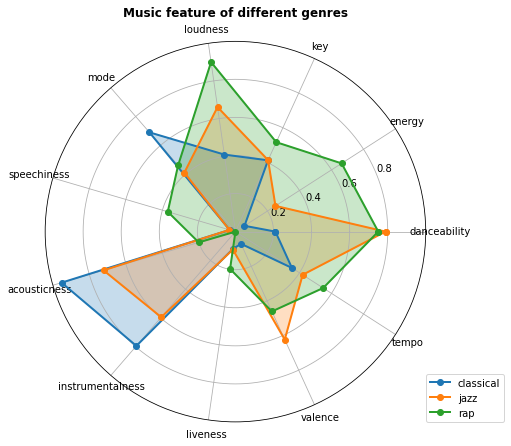

In [21]:
labels=np.array(cols_feature)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

angles=np.concatenate((angles,[angles[0]]))

colors = ['tab:blue','tab:orange','tab:green']

fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)
for genre,color in zip(df_polar.index,colors):
    stats=df_polar.loc[genre,labels].values
    stats=np.concatenate((stats,[stats[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color=color,label=genre)
    ax.fill(angles, stats, alpha=0.25,color=color)
ax.set_thetagrids((angles * 180/np.pi)[:-1], labels,size=10)
ax.set_title('Music feature of different genres',size=12,weight='bold')
ax.grid(True)
ax.legend(fontsize=10,loc=[1,0])

## Distribution of each feature 

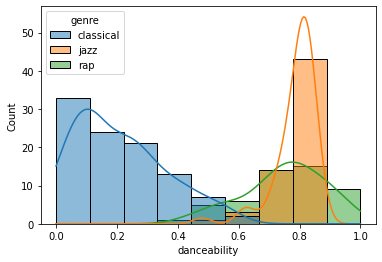

In [22]:
sns.histplot(df,x='danceability',hue='genre',kde=True);

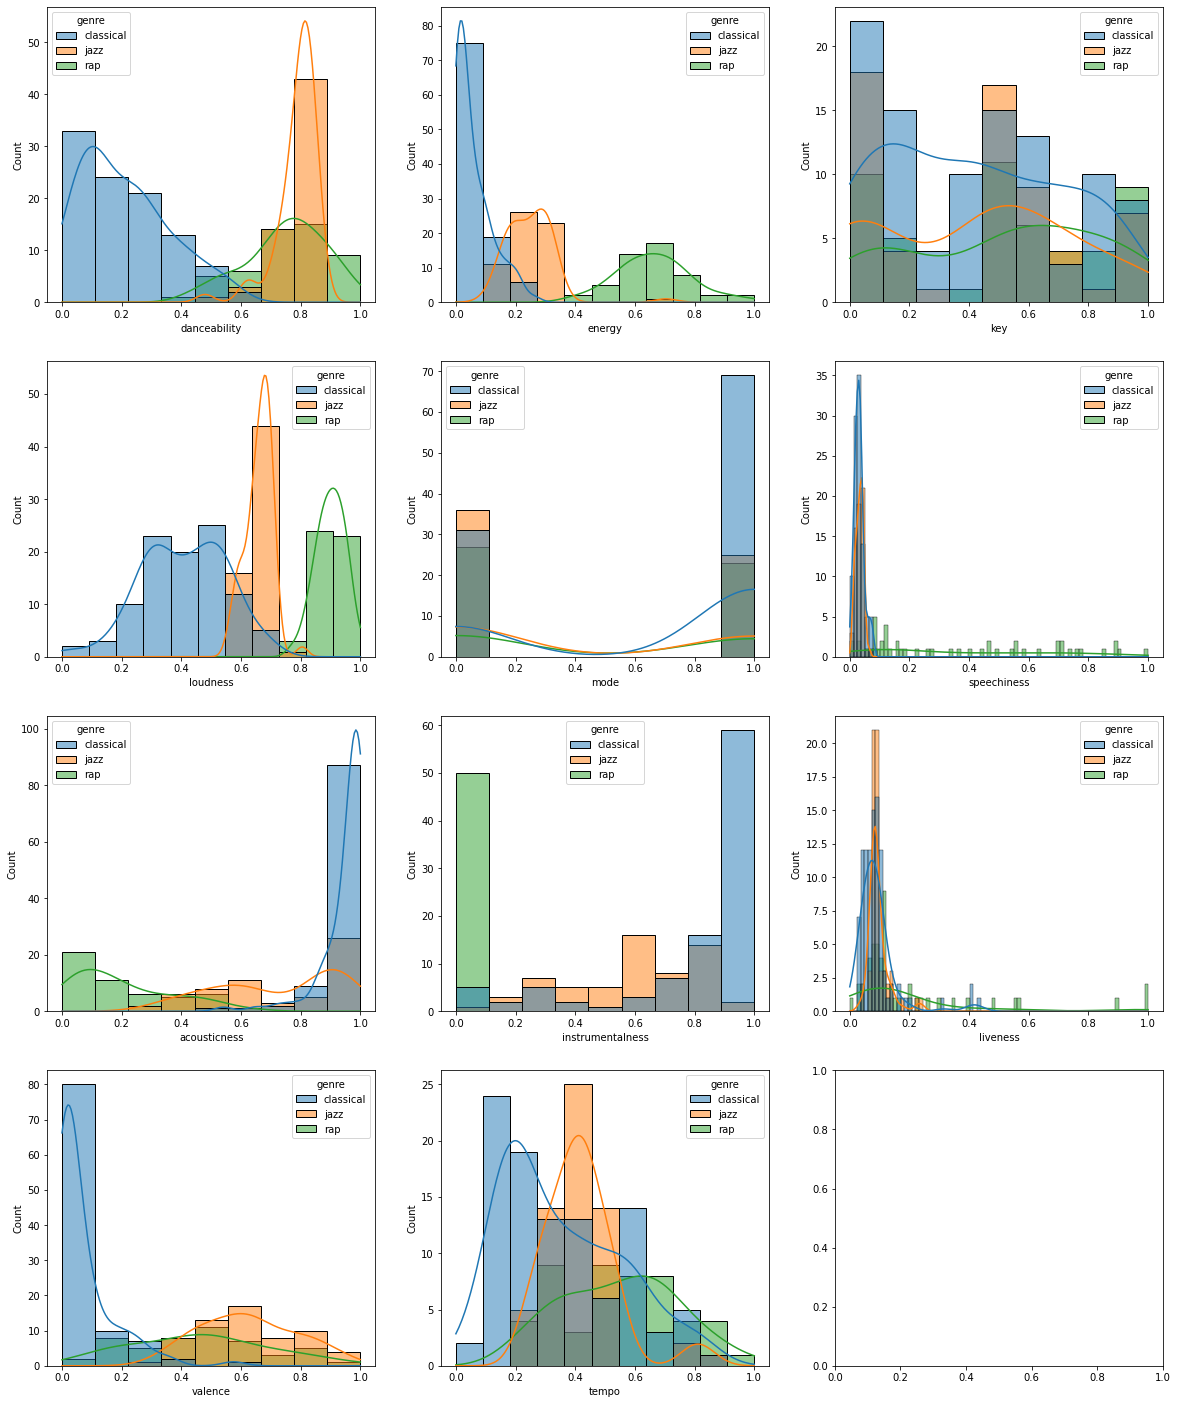

In [ ]:

### create one plot as an example ###
fig,axes = plt.subplots(4,3,figsize=(20,25))
axes = axes.ravel()

for ax,col in zip(axes,cols_feature):
    kde_plot=True
    if col =='instrumentalness':
        # avoid ploting the kde for instrumentalness 
        # can test to see what the kde plot will look like 
        kde_plot=False
    sns.histplot(df, x=col, hue="genre",kde=kde_plot,fill=True,ax=ax)

Here we can see that differen genres have different distributions of music features. These features will be very useful in the model to help us identify the genre of a song. 

## joint histogram 

Plotting joint histogram is a very common data exploration method. It helps us visualize how different features relate to each other, e.g whether they are correlated or independent. For example, let's plot `danceability` vs `loudness`. Generally speaking, songs that are more danceable are louder. Let's see if this is the case. 

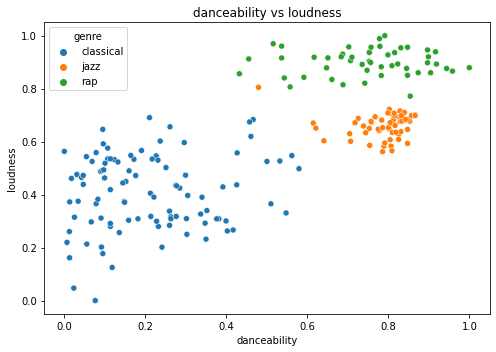

In [23]:
plt.figure(figsize=(7,5))
joint_plot = sns.scatterplot(
    data=df,
    x="danceability", y="loudness",hue='genre'

)

plt.title("danceability vs loudness")
plt.tight_layout()

let's try `energy` and `loudness`. Here we can see a clear relation between `energy` and `loudness`. 

next let's explore more columns by creating the pair plot using seaborn `pariplot` function. 

<Figure size 2160x2160 with 0 Axes>

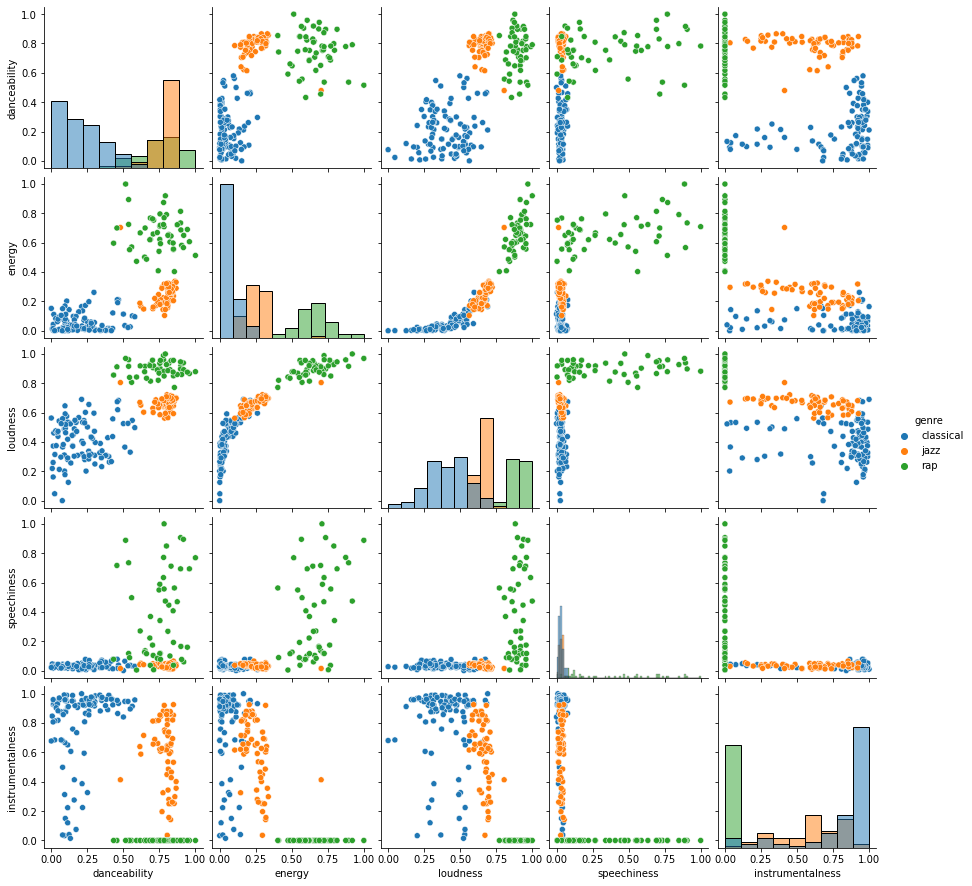

In [ ]:
cols_plot = ['danceability', 'energy', 'loudness', 'speechiness','instrumentalness']
plt.figure(figsize=(30,30))
sns.pairplot(df[cols_plot+['genre']],hue='genre',diag_kind="hist")
# plt.savefig('music_pairplot.pdf')

# build the model - kNN

use danceability and loudness as an example. 

## encode the label column 

First let's change the genre into numbers because that is easier for the model to distinguish. 

In [24]:
dict_genre = {'classical':1,'jazz':2,'rap':3}

In [25]:
df['genre'].replace(dict_genre,inplace=True)

## get training and testing datasets 

Second, let's split the dataset into training and testing datasets. 

**Why spliting?**

The main reason for splitting the data is to test our model before applying it to real world examples. When developing the model, it is likely that we face a problem called overfitting, which means that the model we build fit the data too well that it is useless when feeding new data to it.

 Here we split them into 80-20, as 80% training and 20% testing. The common ratios are 80-20, 70- 30 or 90-10. 

In [27]:
## make sure df is shuffled in the same way 
random_state = 15


In [28]:
def get_train_test(df,test_percent=0.2):
    ## shuffle the data 
    df_shuffle = df.sample(frac = 1,random_state=random_state)
    ## get the cutting index for training and test 
    ind_cut = int(len(df)*(1-test_percent))
    ## get the training and testing data sets 
    df_train = df_shuffle[:ind_cut]
    df_test = df_shuffle[ind_cut:]
    ## get the X_train, y_train, X_test and y_test
    X_train = df_train.drop(columns=['genre'])
    X_test = df_test.drop(columns=['genre'])
    y_train = df_train['genre']
    y_test = df_test['genre']
    return X_train, y_train, X_test, y_test

In [29]:
X_train, y_train, X_test, y_test = get_train_test(df,test_percent=0.2)

## build a knn model from scratch 

Now let's introduce the model we will use to identify the genre of the music, which is call k nearest neighbors. 

1. Load the data
2. Set the value of K
3. For each example in the data

  3.1 Calculate the distance between the query example and the current example from the data.

  3.2 Append the distance and the index of the example to a list

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. Return the mode of the K labels


ref: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761


In [30]:
## I adopted the scripts from https://gist.github.com/onelharrison/373d81dc21d43c3126f15d2d0867d80a#file-knn_from_scratch-py 
def knn(X_train,y_train, x_test, k):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, x_train in enumerate(X_train):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = euclidean_distance(x_train, x_test)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [y_train[i] for distance, i in k_nearest_distances_and_indices]

  
    # 7. Return the mode of the K labels
    predict_labels = mode(k_nearest_labels)
    return k_nearest_distances_and_indices , predict_labels


def mode(labels):
    return max(set(labels), key=labels.count)

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)


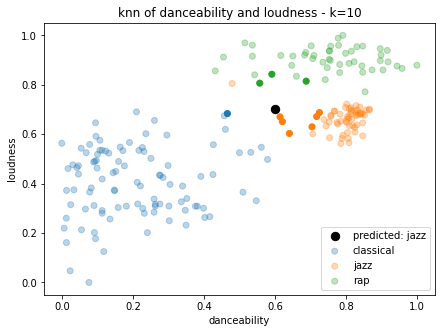

In [31]:
df_example = df[['danceability','loudness','genre']]
colors = np.array(['tab:blue','tab:orange','tab:green'])
genres = ['classical','jazz','rap']
def visualize_knn(df,colors,classes,k=3,xv=0.5,yv=0.5):
    test = np.array([xv,yv]).T
    X_train = df.iloc[:,:-1].values
    y_train = df.iloc[:,-1].values
    k_nearest_distances_and_indices, test_prediction = knn(
            X_train,y_train,test, k=k)
    indices = [ind[1] for ind in k_nearest_distances_and_indices]
    figure,ax = plt.subplots(figsize=(7,5))
    ax.scatter(x=xv,y=yv,c='k',s=70,label = 'predicted: '+classes[test_prediction-1])
    ax.scatter(x=X_train[indices][:,0],y=X_train[indices][:,1],c=colors[y_train[indices]-1])
    for label in df.iloc[:,2].unique():
        index = df.iloc[:,2]  == label
        ax.scatter(x=df.iloc[:,0][index],y=df.iloc[:,1][index],\
                   c=colors[df.iloc[:,2][index].values-1],label=classes[label-1],alpha=0.3)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title('knn of {} and {} - k={}'.format(df.columns[0],df.columns[1],k))

    # produce a legend with the unique colors from the scatter
    plt.legend(loc='lower right')
    
    
visualize_knn(df_example,colors=colors, classes=genres,k=10,xv=0.6,yv=0.7)    

Here we can choose more features. However, with more features, it get harder to visualize the process. But the gist is the same. We calculate the distance between the known-label points and unknown-label points and use the mode of the labels as the label of hte unknown-label point. Now let's actually build the model.

In [32]:
def knn_predict(X_train,y_train,X_test,k):
    y_predict = []
    for _,x_test in enumerate(X_test):
        k_nearest_neighbors, prediction = knn(
            X_train,y_train,x_test , k=k
        )
        y_predict = y_predict+ [prediction]
    return y_predict

In [33]:
y_pred = knn_predict(X_train.values,y_train.values,X_test.values,k=8)

# Evaluate the model 

There are various ways of evaluating a model. The most common one is to calculate the prediction accuracy - how accurate is our prediction. For classification problem, accuracy can be calculated as 

$$
ACCURACY = \frac{\textrm{NUMBER OF CORRECT PREDICTION}}{\textrm{NUMBER OF TOTAL PREDICTION}}
$$

In [34]:
def cal_accuracy(y_pred,y_test):
    return sum(y_pred == y_test)/len(y_test)

In [35]:
print('knn accuracy = {:.0%}'.format(cal_accuracy(y_pred, y_test)))

knn accuracy = 100%


Here we can see that the knn model is really good with having a 100% accuracy. This could be that the three genres we pick are different enough that the model can distinguish them easily. 

# Let's listen to one 

In [46]:
df_test = X_test.copy()
df_test['genre'] = y_test
## attached predicted genres to the df_test dataframe
df_test['genre_pred'] = y_pred
song = df_test.sample()
song_id = df_complete.iloc[song.index]['id'].tolist()[0]
print('genre: {}, predicted genre: {}'.format(genres[song['genre'].values[0]-1],genres[song['genre_pred'].values[0]-1]))

uri_prefix = 'https://open.spotify.com/track/'
uri_song = uri_prefix + song_id
print(uri_song)
# webbrowser.open(uri_song, new=2)

genre: rap, predicted genre: rap
https://open.spotify.com/track/7iHHxY2NLlJRAmlAmC4ahQ


# A much faster and simplier way! 

So far all the model functions are written by ourselves. However, that is not how data scientists work every day. There are tons of well-developed libraries that we can use one line of code of get. Here we introduce the very famous machine learning library called `sklearn`. Almost 90% of machine learning algorithms are included in this library. Now let's see how we can recreate our knn model using `sklearn`.



## for standardize the data 
Here we can see that value range varies in different columns. Therefore, one thing we can do is to standardize the data. We can use a built-in function from sklearn library called `MinMaxScaler()`. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one (this is set by default).

The function is 
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

where the default values for max and min are 1 and 0. 

Reference can be found <a herf="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">here</a>. 

In [47]:
## transform
from sklearn.preprocessing import MinMaxScaler

## import ML (machine learning) related libraries 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [48]:
scaler = MinMaxScaler()
df[cols_feature] = scaler.fit_transform(df[cols_feature])

## For splitting the data 

In [51]:
## split training and testing datasets 
X = df[cols_feature]
y = df[col_target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## For building the knn model 

In [61]:
y_train

,genre
100,2
94,1
58,1
208,3
145,2
...,...
128,2
119,2
133,2
140,2


In [64]:
## build a knn model 
neigh = KNeighborsClassifier(n_neighbors=8)

## train the knn model 
neigh.fit(X_train, y_train.values.ravel())

## get prediction 
y_prediction_sk = neigh.predict(X_test)

In [65]:
## evaluate the model 
print('knn accuracy = {:.0%}'.format(neigh.score(X_test,y_test)))

knn accuracy = 100%


# The next step 

